<a href="https://colab.research.google.com/github/park-gb/financial-news-sentiment-classifier/blob/main/sentiment_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Info
Last Updated @2022-05-31

### üë®‚Äçüíª Author Info
- Author: Gyeongbin Park(a.k.a., Tony Park)
- Blog: https://heytech.tistory.com/
- Github: https://github.com/park-gb
- Contact: dev.gbpark@gmail.com

### üìö References
- PLM(KLUE/Bert-base): https://huggingface.co/klue/bert-base
- Dataset: https://github.com/ukairia777/finance_sentiment_corpus/blob/main/finance_data.csv

# Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏å Ïó∞Îèô
- "Mounted at /content/drive/"ÏôÄ Í∞ôÏùÄ Ï∂úÎ†•Ïù¥ ÎÇòÏôîÎã§Î©¥ Ïó∞Îèô Ï†ïÏÉÅ

In [22]:
import os
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


:

# Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò

## Hugging Face Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
- ÏÇ¨Ï†Ñ ÌïôÏäµ Ïñ∏Ïñ¥Î™®Îç∏Í≥º tokenizerÎ•º Ìé∏Î¶¨ÌïòÍ≤å Î∂àÎü¨Ïò¨ Ïàò ÏûàÎäî Hugging Face ÌôúÏö©ÏùÑ ÏúÑÌïú Ìå®ÌÇ§ÏßÄÎ•º ÏÑ§ÏπòÌï©ÎãàÎã§.

In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 4.2 MB 4.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 596 kB 67.5 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.6 MB 60.3 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 86 kB 6.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


## RAdam Ìå®ÌÇ§ÏßÄ ÏÑ§Ïπò
- OptimizerÎ°úÏç® Rectified AdamÏùÑ ÏÇ¨Ïö©Ìï† ÏòàÏ†ïÏûÖÎãàÎã§.

In [3]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 4.3 MB/s 


# Ìå®ÌÇ§ÏßÄ import

In [4]:
import os
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
                            roc_auc_score, confusion_matrix, classification_report, \
                            matthews_corrcoef, cohen_kappa_score, log_loss

# Ïñ∏Ïñ¥Î™®Îç∏ Î∞è Tokenizer Î∂àÎü¨Ïò§Í∏∞
- Hugging FaceÏóêÏÑú Í∞ÑÌé∏ÌïòÍ≤å Pretrained Ïñ∏Ïñ¥ Î™®Îç∏Í≥º tokenizerÎ•º Î∂àÎü¨ÏòµÎãàÎã§.
- [KLUE Bert-base Î™®Îç∏](https://huggingface.co/klue/bert-base)ÏùÑ ÌôúÏö©ÌïòÏòÄÏäµÎãàÎã§.

In [5]:
MODEL_NAME = "klue/bert-base"
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, from_pt=True)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/425 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/424M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/243k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/125 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/289 [00:00<?, ?B/s]

# GPU ÏûëÎèôÌôïÏù∏

In [6]:
device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
  print("GPU ÏûëÎèô Ï§ë")
  mirrored_strategy = tf.distribute.MirroredStrategy()
else:
  print("GPU ÎØ∏ÏûëÎèô Ï§ë")

GPU ÏûëÎèô Ï§ë
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)


# Îç∞Ïù¥ÌÑ∞ÏÖã Load

In [7]:
DATASET_URL = "https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv"
DATASET_NAME = "finance_data.csv"

In [8]:
urllib.request.urlretrieve(DATASET_URL, 
                           filename = DATASET_NAME
                           )

('finance_data.csv', <http.client.HTTPMessage at 0x7f7b4cbf3d10>)

In [9]:
dataset = pd.read_csv(DATASET_NAME)
dataset.head()

labels                                           sentence  \
0   neutral  According to Gran, the company has no plans to...   
1   neutral  Technopolis plans to develop in stages an area...   
2  negative  The international electronic industry company ...   
3  positive  With the new production plant the company woul...   
4  positive  According to the company's updated strategy fo...   

                                        kor_sentence  
0  GranÏóê Îî∞Î•¥Î©¥, Í∑∏ ÌöåÏÇ¨Îäî ÌöåÏÇ¨Í∞Ä ÏÑ±Ïû•ÌïòÍ≥† ÏûàÎäî Í≥≥Ïù¥ÏßÄÎßå, Î™®Îì† ÏÉùÏÇ∞ÏùÑ Îü¨ÏãúÏïÑÎ°ú...  
1  ÌÖåÌÅ¨ÎÖ∏Ìè¥Î¶¨Ïä§Îäî Ïª¥Ìì®ÌÑ∞ Í∏∞Ïà†Í≥º ÌÜµÏã† Î∂ÑÏïºÏóêÏÑú ÏùºÌïòÎäî ÌöåÏÇ¨Îì§ÏùÑ Ïú†ÏπòÌïòÍ∏∞ ÏúÑÌï¥ 10Îßå Ìèâ...  
2  Íµ≠Ï†ú Ï†ÑÏûêÏÇ∞ÏóÖ ÌöåÏÇ¨Ïù∏ ÏóòÏΩîÌÖçÏùÄ ÌÉàÎ¶∞ Í≥µÏû•ÏóêÏÑú ÏàòÏã≠ Î™ÖÏùò ÏßÅÏõêÏùÑ Ìï¥Í≥†ÌñàÏúºÎ©∞, Ïù¥Ï†ÑÏùò ...  
3  ÏÉàÎ°úÏö¥ ÏÉùÏÇ∞Í≥µÏû•ÏúºÎ°ú Ïù∏Ìï¥ ÌöåÏÇ¨Îäî ÏòàÏÉÅÎêòÎäî ÏàòÏöî Ï¶ùÍ∞ÄÎ•º Ï∂©Ï°±ÏãúÌÇ¨ Ïàò ÏûàÎäî Îä•Î†•ÏùÑ Ï¶ùÍ∞Ä...  
4  2009-2012ÎÖÑ ÌöåÏÇ¨Ïùò ÏóÖÎç∞Ïù¥Ìä∏Îêú Ï†ÑÎûµÏóê Îî∞Î•¥Î©¥, BaswareÎäî 20% - 4...

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

## ÏòÅÏñ¥ Îâ¥Ïä§ Í∏∞ÏÇ¨ ÏπºÎüº Ï†úÍ±∞

In [10]:
del dataset['sentence']

## ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ Ïà´Ïûê ÏπòÌôò

In [11]:
dataset['labels'] = dataset['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])
dataset.head()

labels                                       kor_sentence
0       0  GranÏóê Îî∞Î•¥Î©¥, Í∑∏ ÌöåÏÇ¨Îäî ÌöåÏÇ¨Í∞Ä ÏÑ±Ïû•ÌïòÍ≥† ÏûàÎäî Í≥≥Ïù¥ÏßÄÎßå, Î™®Îì† ÏÉùÏÇ∞ÏùÑ Îü¨ÏãúÏïÑÎ°ú...
1       0  ÌÖåÌÅ¨ÎÖ∏Ìè¥Î¶¨Ïä§Îäî Ïª¥Ìì®ÌÑ∞ Í∏∞Ïà†Í≥º ÌÜµÏã† Î∂ÑÏïºÏóêÏÑú ÏùºÌïòÎäî ÌöåÏÇ¨Îì§ÏùÑ Ïú†ÏπòÌïòÍ∏∞ ÏúÑÌï¥ 10Îßå Ìèâ...
2       2  Íµ≠Ï†ú Ï†ÑÏûêÏÇ∞ÏóÖ ÌöåÏÇ¨Ïù∏ ÏóòÏΩîÌÖçÏùÄ ÌÉàÎ¶∞ Í≥µÏû•ÏóêÏÑú ÏàòÏã≠ Î™ÖÏùò ÏßÅÏõêÏùÑ Ìï¥Í≥†ÌñàÏúºÎ©∞, Ïù¥Ï†ÑÏùò ...
3       1  ÏÉàÎ°úÏö¥ ÏÉùÏÇ∞Í≥µÏû•ÏúºÎ°ú Ïù∏Ìï¥ ÌöåÏÇ¨Îäî ÏòàÏÉÅÎêòÎäî ÏàòÏöî Ï¶ùÍ∞ÄÎ•º Ï∂©Ï°±ÏãúÌÇ¨ Ïàò ÏûàÎäî Îä•Î†•ÏùÑ Ï¶ùÍ∞Ä...
4       1  2009-2012ÎÖÑ ÌöåÏÇ¨Ïùò ÏóÖÎç∞Ïù¥Ìä∏Îêú Ï†ÑÎûµÏóê Îî∞Î•¥Î©¥, BaswareÎäî 20% - 4...

## Í≤∞Ï∏°Ïπò ÌôïÏù∏

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   labels        4846 non-null   int64 
 1   kor_sentence  4846 non-null   object
dtypes: int64(1), object(1)
memory usage: 75.8+ KB


## Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞

In [21]:
dataset

labels                                       kor_sentence
0          0  GranÏóê Îî∞Î•¥Î©¥, Í∑∏ ÌöåÏÇ¨Îäî ÌöåÏÇ¨Í∞Ä ÏÑ±Ïû•ÌïòÍ≥† ÏûàÎäî Í≥≥Ïù¥ÏßÄÎßå, Î™®Îì† ÏÉùÏÇ∞ÏùÑ Îü¨ÏãúÏïÑÎ°ú...
1          0  ÌÖåÌÅ¨ÎÖ∏Ìè¥Î¶¨Ïä§Îäî Ïª¥Ìì®ÌÑ∞ Í∏∞Ïà†Í≥º ÌÜµÏã† Î∂ÑÏïºÏóêÏÑú ÏùºÌïòÎäî ÌöåÏÇ¨Îì§ÏùÑ Ïú†ÏπòÌïòÍ∏∞ ÏúÑÌï¥ 10Îßå Ìèâ...
2          2  Íµ≠Ï†ú Ï†ÑÏûêÏÇ∞ÏóÖ ÌöåÏÇ¨Ïù∏ ÏóòÏΩîÌÖçÏùÄ ÌÉàÎ¶∞ Í≥µÏû•ÏóêÏÑú ÏàòÏã≠ Î™ÖÏùò ÏßÅÏõêÏùÑ Ìï¥Í≥†ÌñàÏúºÎ©∞, Ïù¥Ï†ÑÏùò ...
3          1  ÏÉàÎ°úÏö¥ ÏÉùÏÇ∞Í≥µÏû•ÏúºÎ°ú Ïù∏Ìï¥ ÌöåÏÇ¨Îäî ÏòàÏÉÅÎêòÎäî ÏàòÏöî Ï¶ùÍ∞ÄÎ•º Ï∂©Ï°±ÏãúÌÇ¨ Ïàò ÏûàÎäî Îä•Î†•ÏùÑ Ï¶ùÍ∞Ä...
4          1  2009-2012ÎÖÑ ÌöåÏÇ¨Ïùò ÏóÖÎç∞Ïù¥Ìä∏Îêú Ï†ÑÎûµÏóê Îî∞Î•¥Î©¥, BaswareÎäî 20% - 4...
...      ...                                                ...
4841       2  Îü∞Îçò ÎßàÏºìÏõåÏπò -- ÏùÄÌñâÏ£ºÏùò Î∞òÎì±Ïù¥ FTSE 100ÏßÄÏàòÏùò ÏïΩÏÑ∏Î•º ÏÉÅÏáÑÌïòÏßÄ Î™ªÌïòÎ©¥ÏÑú ...
4842       0  Î¶∞Ïø†Ïä§ÌÇ§ÏïÑÏùò Îß•Ï£º ÌåêÎß§ÎüâÏùÄ 416Îßå Î¶¨ÌÑ∞Î°ú 6.5% Í∞êÏÜåÌñàÏúºÎ©∞ Ïπ¥Ïö∞ÎÖ∏ ÏïåÎ£®Ïä§Ïùò Îß•Ï£º...
4843       2  ÏòÅÏóÖÏù¥ÏùµÏùÄ 2007ÎÖÑ 68.8 mnÏóêÏÑú 35.4 mnÏúºÎ°ú Îñ®Ïñ¥Ï°åÏúºÎ©∞, ÏÑ†Î∞ï ÌåêÎß§ Ïù¥...
4844       2  ÌéòÏù¥Ìçº Î∂ÄÎ¨∏ ÏàúÎß§Ï∂úÏùÄ 2008ÎÖÑ 2Î∂ÑÍ∏∞ 241.1 mnÏóêÏÑú 2009ÎÖÑ 2Î∂ÑÍ∏∞ 221...
4845       2   ÌïÄÎûÄÎìúÏóêÏÑúÏùò ÌåêÎß§Îäî 1ÏõîÏóê 10.5% Í∞êÏÜåÌïú Î∞òÎ©¥, Íµ≠Ïô∏ÏóêÏÑúÏùò ÌåêÎß§Îäî 17% Í∞êÏÜåÌñàÎã§.

[4846 rows x 2 columns]

In [ ]:
# Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
dataset[dataset['kor_sentence'].duplicated()]

labels                                       kor_sentence
79         1  ÌÖîÎ†àÏΩ§ÏõîÎìúÏôÄÏù¥Ïñ¥-2006ÎÖÑ 4Ïõî 7Ïùº-TJ Í∑∏Î£πÏùÄ Î™®Îãù ÎîîÏßÄÌÑ∏ ÎîîÏûêÏù∏ Oy ÌïÄÎûÄÎìú ...
789        0  Í∑∏Î£πÏùò ÏÇ¨ÏóÖÏùÄ Ïä§Ìè¨Ï∏†Ïùò Í¥ëÎ≤îÏúÑÌïú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ÏôÄ Î™®Îì† Ï£ºÏöî ÏãúÏû•ÏóêÏÑúÏùò ÏûÖÏßÄÏóê ÏùòÌï¥ Í∑†Ìòï...
1099       0                   Ïù¥ Î∞úÌëú ÎÇ¥Ïö©Ïóê ÎåÄÌïú Ï±ÖÏûÑÏùÄ Ï†ÑÏ†ÅÏúºÎ°ú Î∞úÌñâÏûêÏóêÍ≤å ÏûàÏäµÎãàÎã§.
1394       0  ÌïÄÎûÄÎìú Ìó¨Ïã±ÌÇ§Ïóê Î≥∏ÏÇ¨Î•º Îëî Î†àÎØºÏπ¥Ïù¥ÎÑ® Í∑∏Î£πÏùÄ ÌÜ†Î™© Í≥µÌïô, Í±¥Ï∂ï Í≥ÑÏïΩ, Í∏∞Ïà† Í±¥Ï∂ï ÏÑú...
1416       0  Ïù¥ Î≥¥Í≥†ÏÑúÎäî Î∏îÎûô Ïï§ Îç∞Ïª§, ÌîºÏä§Ïπ¥Ïä§, ÌîºÏä§Ïπ¥Ïä§ Î∏åÎûúÎìú, ÌõÑÏä§ÌÅ¨Î∞îÎ•¥ÎÇò ÏïÑÏõÉÎèÑÏñ¥ ÌîÑÎ°ú...
2396       0                   ÏïåÏä§Ìä∏Î°¨Ïùò Ï£ºÍ∞ÄÎäî ÎÇòÏä§Îã• OMX Ìó¨Ïã±ÌÇ§ÏóêÏÑú Ïù∏Ïö©ÎêòÍ≥† ÏûàÎã§.
2567       0               SSH ÌÜµÏã† Î≥¥Ïïà ÏΩîÌçºÎ†àÏù¥ÏÖòÏùÄ ÌïÄÎûÄÎìú Ìó¨Ïã±ÌÇ§Ïóê Î≥∏ÏÇ¨Î•º ÎëêÍ≥† ÏûàÎã§.
2889       0                               Ïû¨Ï†ïÏ†ÅÏù∏ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ÏùÄ Í≥µÍ∞úÎêòÏßÄ ÏïäÏïòÎã§.
2890       0                               Ïû¨Ï†ïÏ†ÅÏù∏ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ÏùÄ Í≥µÍ∞úÎêòÏßÄ ÏïäÏïòÎã§.
2892       0                                   Í∏àÏúµ Ï°∞Í±¥ÏùÄ Í≥µÍ∞úÎêòÏßÄ ÏïäÏïòÎã§.
3050       0                               Ïû¨Ï†ïÏ†ÅÏù∏ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ÏùÄ Ï†úÍ≥µÎêòÏßÄ ÏïäÏïòÎã§.
3051       0                               Ïû¨Ï†ïÏ†ÅÏù∏ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ÏùÄ Í≥µÍ∞úÎêòÏßÄ ÏïäÏïòÎã§.
3094       0  Proha Plc (Euronext :7327)Îäî Ïò§Îäò (5Ïõî 19Ïùº) ÏôÑÏ†Ñ ÏÜåÏú† ...
3206       0  Í≥µÏ†ï Î∞è ÏûêÏõê, ÏÇ∞ÏóÖÍ∏∞Í≥Ñ, Í±¥Ï∂ï, Í±¥Ï∂ï, Í±¥ÏÑ§, Ï†ÑÍ∏∞, Ïö¥ÏÜ°, Ï†ÑÏûê, ÌôîÌïô, ÏÑùÏú†Ìôî...
3350       0                                   ÌåêÎß§ Í∞ÄÍ≤©ÏùÄ Í≥µÍ∞úÎêòÏßÄ ÏïäÏïòÎã§.
3538       0     ÏïÑÏä§Ìè¨Ïùò Í∑∏Î£π Íµ¨Ï°∞ÏôÄ ÎπÑÏ¶àÎãàÏä§ Ïö¥ÏòÅÏùÄ ÎØ∏Î¶¨ Ï†ïÏùòÎêú ÏùºÏ†ï ÏóÜÏù¥ ÏßÄÏÜçÏ†ÅÏúºÎ°ú Í∞úÎ∞úÎê©ÎãàÎã§.
3605       0  ÌïÄÎûÄÎìú ÌÉêÌéòÎ†àÏóê Î≥∏ÏÇ¨Î•º Îëî GlastonÏùÄ ÏÑ±Ïû•ÌïòÍ≥† ÏûàÎäî Íµ≠Ï†úÏ†ÅÏù∏ Ïú†Î¶¨ Í∏∞Ïà† ÌöåÏÇ¨ÏûÖÎãàÎã§.
3617       0                    2007ÎÖÑÏóê ÏóêÌä∏ÌîåÎûúÏùÄ 125.2mÏùò ÌöåÏ†ÑÏú®ÏùÑ Í∏∞Î°ùÌñàÎã§.
3938       0                                Í∑∏ Í±∞ÎûòÏùò Í∞ÄÏπòÎäî Í≥µÍ∞úÎêòÏßÄ ÏïäÏïòÎã§.

In [ ]:
DATASET_PREP_FILE = './data/dataset_prep.csv'
# Ï§ëÎ≥µ Îç∞Ïù¥ÌÑ∞ Ï†úÍ±∞
dataset.drop_duplicates(subset = ['kor_sentence'], inplace = True)
dataset.to_csv(DATASET_PREP_FILE)

# ÎùºÎ≤® ÎπÑÏú® ÌôïÏù∏

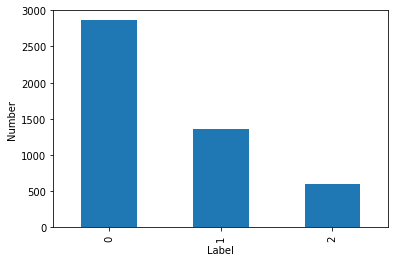

In [ ]:
LABEL_NUM_FILE = './figure/label_number.png'
dataset['labels'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Number")
plt.savefig(LABEL_NUM_FILE)

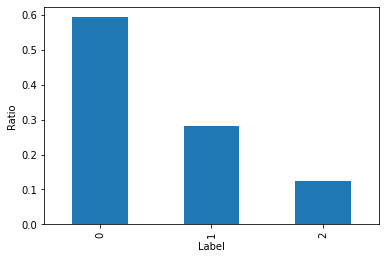

In [ ]:
LABEL_RATIO_FILE = './figure/label_ratio.png'
dataset['labels'].value_counts(normalize = True).plot(kind = 'bar', )
plt.xlabel("Label")
plt.ylabel("Ratio")
plt.savefig(LABEL_RATIO_FILE)

In [ ]:
dataset['labels'].value_counts(normalize = True)

0    0.592708
1    0.282163
2    0.125129
Name: labels, dtype: float64

# ÌõàÎ†®/ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨

In [ ]:
# ÏûÖÏ∂úÎ†• Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ¶¨
X_data = dataset['kor_sentence']
y_data = dataset['labels']

In [ ]:
TEST_SIZE = 0.2
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE, 
                                                    stratify = y_data)

In [ ]:
print(f"ÌõàÎ†® ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(X_train)}")
print(f"ÌÖåÏä§Ìä∏ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: {len(X_test)}")

ÌõàÎ†® ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 3861
ÌÖåÏä§Ìä∏ ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Í∞úÏàò: 966


In [ ]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®Î≥Ñ ÎπÑÏú®
y_train.value_counts(normalize = True)

0    0.592852
1    0.282051
2    0.125097
Name: labels, dtype: float64

In [ ]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÎùºÎ≤®Î≥Ñ ÎπÑÏú®
y_test.value_counts(normalize = True)

0    0.592133
1    0.282609
2    0.125259
Name: labels, dtype: float64

# BERTÏö© ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞ Ìè¨Îß∑ Î≥ÄÍ≤Ω

In [ ]:
# Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ Ï†úÌïú
MAX_SEQ_LEN = 64

In [ ]:
def convert_data(X_data, y_data):
    # BERT ÏûÖÎ†•ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎäî token, mask, segment, target Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
    tokens, masks, segments, targets = [], [], [], []
    
    for X, y in tqdm(zip(X_data, y_data)):
        # token: ÏûÖÎ†• Î¨∏Ïû• ÌÜ†ÌÅ∞Ìôî
        token = tokenizer.encode(X, truncation = True, padding = 'max_length', max_length = MAX_SEQ_LEN)
        
        # Mask: ÌÜ†ÌÅ∞ÌôîÌïú Î¨∏Ïû• ÎÇ¥ Ìå®Îî©Ïù¥ ÏïÑÎãå Í≤ΩÏö∞ 1, Ìå®Îî©Ïù∏ Í≤ΩÏö∞ 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
        num_zeros = token.count(0)
        mask = [1] * (MAX_SEQ_LEN - num_zeros) + [0] * num_zeros
        
        # segment: Î¨∏Ïû• Ï†ÑÌõÑÍ¥ÄÍ≥Ñ Íµ¨Î∂Ñ: Ïò§ÏßÅ Ìïú Î¨∏Ïû•Ïù¥ÎØÄÎ°ú Î™®Îëê 0ÏúºÎ°ú Ï¥àÍ∏∞Ìôî
        segment = [0]*MAX_SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        targets.append(y)

    # numpy arrayÎ°ú Ï†ÄÏû•
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

In [ ]:
# train Îç∞Ïù¥ÌÑ∞Î•º Î≤ÑÌä∏ Ïù∏ÌíãÏóê ÎßûÍ≤å Î≥ÄÌôò
train_x, train_y = convert_data(X_train, y_train)

3861it [00:01, 2217.98it/s]


In [ ]:
# test Îç∞Ïù¥ÌÑ∞Î•º Î≤ÑÌä∏ Ïù∏ÌíãÏóê ÎßûÍ≤å Î≥ÄÌôò
test_x, test_y = convert_data(X_test, y_test)

966it [00:00, 2187.05it/s]


# BERT Î™®Îç∏ÎßÅ

In [ ]:
# token, mask, segment ÏûÖÎ†• Ï†ïÏùò
token_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_word_ids')
mask_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_masks')
segment_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_segment')
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

In [ ]:
bert_outputs

TFSequenceClassifierOutput([('logits',
                             <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'tf_bert_for_sequence_classification')>)])

In [ ]:
bert_output = bert_outputs[0]

# ÌååÏù∏ÌäúÎãù: Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏

## Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏ Ïª¥ÌååÏùº

In [ ]:
DROPOUT_RATE = 0.5
NUM_CLASS = 3
dropout = tf.keras.layers.Dropout(DROPOUT_RATE)(bert_output)
sentiment_layer = tf.keras.layers.Dense(NUM_CLASS, activation='softmax', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev=0.02))(dropout)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_layer)

In [ ]:
OPTIMIZER_NAME = 'RAdam'
LEARNING_RATE = 5e-5
TOTAL_STEPS = 10000
MIN_LR = 1e-5
WARMUP_PROPORTION = 0.1
EPSILON = 1e-8
CLIPNORM = 1.0
optimizer = tfa.optimizers.RectifiedAdam(learning_rate = LEARNING_RATE,
                                          total_steps = TOTAL_STEPS, 
                                          warmup_proportion = WARMUP_PROPORTION, 
                                          min_lr = MIN_LR, 
                                          epsilon = EPSILON,
                                          clipnorm = CLIPNORM)

In [ ]:
sentiment_model.compile(optimizer = optimizer, loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

## Ï°∞Í∏∞Ï¢ÖÎ£å Ï°∞Í±¥

In [ ]:
MIN_DELTA = 1e-3
PATIENCE = 5

In [ ]:
early_stopping = EarlyStopping(
    monitor = "val_accuracy", 
    min_delta = MIN_DELTA,
    patience = PATIENCE)

## ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Ï†ÄÏû•

In [ ]:
BEST_MODEL_NAME = './model/best_model.h5'

In [ ]:
model_checkpoint = ModelCheckpoint(
    filepath = BEST_MODEL_NAME,
    monitor = "val_loss",
    mode = "min",
    save_best_only = True,
    verbose = 1
)

In [ ]:
callbacks = [early_stopping, model_checkpoint]

## Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏ ÌïôÏäµ

In [ ]:
EPOCHS = 100
BATCH_SZIE = 32

In [ ]:
sentiment_model.fit(train_x, train_y, 
                    epochs = EPOCHS, 
                    shuffle = True, 
                    batch_size = BATCH_SZIE, 
                    validation_data = (test_x, test_y),
                    callbacks = callbacks
                    )

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 1.0957 - accuracy: 0.5038
Epoch 1: val_loss improved from inf to 1.09105, saving model to ./model/best_model.h5
121/121 [==============================] - 100s 535ms/step - loss: 1.0957 - accuracy: 0.5038 - val_loss: 1.0910 - val_accuracy: 0.5921
Epoch 2/100
121/121 [==============================] - ETA: 0s - loss: 1.0814 - accuracy: 0.5926
Epoch 2: val_loss improved from 1.09105 to 1.06527, saving model to ./model/best_model.h5
121/121 [==============================] - 71s 588ms/step - loss: 1.0814 - accuracy: 0.5926 - val_loss: 1.0653 - val_accuracy: 0.5921
Epoch 3/100
121/121 [==============================] - ETA: 0s - loss: 1.0416 - accuracy: 0.6397
Epoch 3: val_loss improved from 1.06527 to 1.01254, saving model to ./model/best_model.h5
121/121 [==============================] - 71s 591ms/step - loss: 1.0416 - accuracy: 0.6397 - val_loss: 1.0125 - val_accuracy: 0.6874
Epoch 4/100
121/121 [===================

# Í∞êÏ†ï Î∂ÑÎ•òÏùò ÏòàÏ∏°Í∞í Í≥ÑÏÇ∞

In [ ]:
# ÏµúÍ≥† ÏÑ±Îä•Ïùò Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
sentiment_model_best = tf.keras.models.load_model(BEST_MODEL_NAME,
                                                  custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})

In [ ]:
# Î™®Îç∏Ïù¥ ÏòàÏ∏°Ìïú ÎùºÎ≤® ÎèÑÏ∂ú
predicted_value = sentiment_model_best.predict(test_x)
predicted_label = np.argmax(predicted_value, axis = 1)

# Í∞êÏ†ï Î∂ÑÎ•ò Î™®Îç∏Ïùò ÏÑ±Îä• ÌèâÍ∞Ä

## Classification Report

In [ ]:
# Classification Report Ï†ÄÏû•
CL_REPORT_FILE = "./metric/cl_report.csv"
cl_report = classification_report(test_y, predicted_label, output_dict = True)
cl_report_df = pd.DataFrame(cl_report).transpose()
cl_report_df = cl_report_df.round(3)
cl_report_df.to_csv(CL_REPORT_FILE)
print(cl_report_df)

              precision  recall  f1-score  support
0                 0.871   0.907     0.889  572.000
1                 0.816   0.766     0.790  273.000
2                 0.833   0.785     0.809  121.000
accuracy          0.852   0.852     0.852    0.852
macro avg         0.840   0.819     0.829  966.000
weighted avg      0.851   0.852     0.851  966.000


## Confusion Matrix

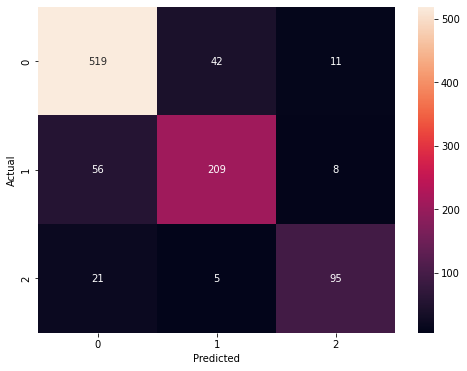

In [ ]:
# Ïù¥ÎØ∏ÏßÄ ÌååÏùº Ï†ÄÏû•Ï†ïÎ≥¥
FIGURE_FILE = "./figure/cf_matrix.png"

cf_matrix = confusion_matrix(test_y, predicted_label)
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(cf_matrix, annot = True, fmt = 'd')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig(FIGURE_FILE)
plt.show()

## Ï†ÑÏ≤¥ ÌèâÍ∞ÄÏßÄÌëú

In [ ]:
accuracy_score_v = round(accuracy_score(y_test, predicted_label), 3) # Accuracy
precision_score_v = round(precision_score(y_test, predicted_label, average="weighted"), 3) # Precision
recall_score_v = round(recall_score(y_test, predicted_label, average="weighted"), 3) # Recall
f1_score_v = round(f1_score(y_test, predicted_label, average="weighted"), 3) # F1 Score
roc_auc_score_v = round(roc_auc_score(y_test, predicted_value, average="weighted", multi_class="ovr"), 3) # ROC AUC Score
cohen_kappa_score_v = round(cohen_kappa_score(y_test, predicted_label), 3) # Cohen's Kappa Score
matthews_corrcoef_v = round(matthews_corrcoef(y_test, predicted_label), 3) # Matthew's Correlation Coefficient
log_loss_v = round(log_loss(y_test, predicted_value), 3) # Log Loss

In [ ]:
METRIC_FILE = './metric/metric.csv'

In [ ]:
metric_total = pd.DataFrame({
    'PLM': MODEL_NAME,
    'Optimizer': OPTIMIZER_NAME,
    'Accuracy': accuracy_score_v,
    'Precision': precision_score_v,
    'Recall': recall_score_v,
    'F1_score': f1_score_v,
    'ROC_AUC_score': roc_auc_score_v,
    'Cohen_kappa_coef': cohen_kappa_score_v,
    'Matthews_corrcoef': matthews_corrcoef_v,
    'Log_loss': log_loss_v},
    index = ['-']
    )

In [ ]:
metric_total.to_csv(METRIC_FILE)

In [ ]:
print(metric_total)

              PLM Optimizer  Accuracy  Precision  Recall  F1_score  \
-  klue/bert-base     RAdam     0.852      0.851   0.852     0.851   

   ROC_AUC_score  Cohen_kappa_coef  Matthews_corrcoef  Log_loss  
-           0.92             0.728              0.729     0.555  
